<a href="https://colab.research.google.com/github/jwang44/Try-colabing-in-colab/blob/main/Credit_card_new_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 551 Mini-project 1
*Group 10: Junhao Wang, Yinan Zhou, and Ruilin Ji*

This notebook is dedicated for the credit card dataset, including the model, cross validation, and various experiment. 

## Start here

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import statistics

## Credit Card Dataset

In [3]:
# generate new feature by multiplication and normalize
def newfeature(x,y):
  z=x*y
  norz=scipy.stats.zscore(z, axis=0, ddof=0, nan_policy='propagate')
  return norz

In [4]:
# convert csv to dataframe
df = pd.read_csv('creditcard.csv')
original_data = df.to_numpy()

In [5]:
# normalize feature
NorData = scipy.stats.zscore(df.iloc[:,:-1], axis=0, ddof=0, nan_policy='propagate') # no class column
# normalized dataset
NorDataset = np.column_stack((NorData,df.iloc[:,-1]))

New feature

In [6]:
NewF1 = newfeature(df.V3, df.V7)
NewF2 = newfeature(df.V11, df.V12)
NewF3 = newfeature(df.V12, df.V16)
NewF4 = newfeature(df.V16, df.V17)
NewF5 = newfeature(df.V16, df.V18)
NewF6 = newfeature(df.V17, df.V18)
NewF7 = df.iloc[:,0]              # initialize new feature 7 using 1st feature
n_row,n_col = np.shape(NorData)
NewFSq = np.zeros(n_row)            # initialize new features using 0s
for col in range(n_col):
  # new feature 7: multiplying all features
  if col>0:
    NewF7 = newfeature(NewF7,df.iloc[:,col])
  # new feature 8-: square all columns
  new = newfeature(df.iloc[:,col],df.iloc[:,col]) # square feature
  NewFSq = np.column_stack((NewFSq,new))

NewFSq = np.delete(NewFSq,0,1)
# new feature
NewF = np.column_stack((NewF1,NewF2,NewF3,NewF4,NewF5,NewF6,NewF7))
# NewF = np.column_stack((NewF1,NewF2,NewF3,NewF4,NewF5,NewF6))

In [7]:
# normalized dataset with new feature
NorDatasetNew = np.column_stack((NorData,NewF,df.iloc[:,-1]))

## The model

In [8]:
 # sigmoid function
def sigmoid(a):
  return 1/(1+np.exp(-a))


class Logistic_regression():
  def __init__(self):#,X_train,y_train,learning_rate,X_test,y_test):
    pass
    
  # train
  def fit(self, X_train, y_train, learning_rate):
    n, m = np.shape(X_train)  # n samples, m features
    y_train = y_train.reshape(-1, 1)
    w = np.ones([m+1, 1]) # features + 1
    dummy_feature = np.ones([n, 1])
    X = np.concatenate((X_train, dummy_feature), axis=1) # n samples, m+1 features
    # max iteration allowed
    max_iter = 5000 
    for i in range(max_iter):
      y_predict = sigmoid(np.matmul(X, w))  # n * 1
      grad = -np.matmul(X.T, (y_train - y_predict))  # m+1 * 1
      w = w - learning_rate * grad
      if np.linalg.norm(learning_rate * grad) < 0.001:
        print("Early stop at iteration: ", i+1)
        break
    return w
  
  # validation
  def predict(self,w,X_test):
    #n,m = np.shape(self.X_test)
    n,m = np.shape(X_test)   
    y_predict = np.zeros([n,1])
    for i in range(0,n):
      #xi = self.X_test[i].T
      xi = X_test[i].T
      x0 = np.array([1])
      xi = np.concatenate((xi, x0),axis = 0)
      p1 = sigmoid(np.matmul(w.T,xi)) # calculate probabilities p(y=1|x)
      # covert probabilities to 0 or 1 by thresholding at 0.5
      if p1>=0.5:
        y_predict[i] = 1
      else:
        y_predict[i] = 0
    return y_predict

  # evaluate accuracy
  def Accu_eval(self,y_test,y_predict):
    #y_predict = self.predict(X_test)
    n,j = np.shape(y_predict)
    TP = 0;FP = 0;TN = 0;FN = 0
    # count TP,TN,FP,FN in validation set
    '''for i in range(n):
      if  self.y_test[i]==1 and y_predict[i]==1:
        TP = TP+1
      elif self.y_test[i]==0 and y_predict[i]==0:
        TN = TN+1
      elif self.y_test[i]==0 and y_predict[i]==1:
        FP = FP+1
      elif self.y_test[i]==1 and y_predict[i]==0:
        FN = FN+1'''
    for i in range(n):
      if  y_test[i]==1 and y_predict[i]==1:
        TP = TP+1
      elif y_test[i]==0 and y_predict[i]==0:
        TN = TN+1
      elif y_test[i]==0 and y_predict[i]==1:
        FP = FP+1
      elif y_test[i]==1 and y_predict[i]==0:
        FN = FN+1    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F = 2*precision*recall/(precision+recall)
    specificity = TN/(FP+TN)
    FPR = FP/(FP+TN)
    print("accuracy:",accuracy)
    # print("precision:",precision)
    # print("recall:",recall)
    # print("F:",F)
    # print("specificity:",specificity)
    # print("False Positive Rate:",FPR)
    # print("")
    return accuracy
    

In [9]:
# figure out which feature is of the most importance
model = Logistic_regression()
np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels
w = model.fit(X,y,learning_rate=0.001)
print(w)

Early stop at iteration:  2408
[[ 1.55081845]
 [ 1.0933058 ]
 [-4.03375893]
 [ 1.94595797]
 [ 1.26066542]
 [-1.71833441]
 [-0.70288352]
 [-2.77580802]
 [-0.22065837]
 [-2.45386379]
 [ 0.14203829]
 [-4.5782209 ]
 [-0.14985273]
 [-1.1939046 ]
 [-0.61306626]
 [-0.16584005]
 [ 1.27379042]
 [ 1.29107767]
 [-0.01049958]
 [-1.0596618 ]
 [-0.4266146 ]
 [ 1.70847384]
 [ 0.45035064]
 [-0.41407882]
 [-0.48774679]
 [ 0.1353532 ]
 [-0.91413545]
 [ 0.12909789]
 [ 1.2530027 ]
 [ 4.96807387]]


## Cross validation

In [10]:
class Cross_validation():
  def __init__(self, k):
    # k: k-fold
    self.k = k

  def prepare_data(self, data):
    # data: np array converted from csv
    np.random.shuffle(data)
    X = data[:, :-1]  # features
    y = data[:, -1]   # labels

    # split data into k equal segments, assign them to train and test later
    Xs = np.array_split(X, self.k, axis=0)
    ys = np.array_split(y, self.k, axis=0)
    return Xs, ys

  def get_accuracy(self, Xs, ys, lr):
    accu_trains = []
    accu_tests = []
    for i in range(self.k):
      X_cv = Xs[:] # X_cross_validation
      y_cv = ys[:] # y_cross_validation

      X_test = X_cv.pop(i)
      y_test = y_cv.pop(i)

      X_train = np.concatenate(X_cv)
      y_train = np.concatenate(y_cv)

      model = Logistic_regression()
      w = model.fit(X_train, y_train, lr)

      print("----------FOLD ", i+1, "----------")

      print("----Train----")
      y_predict_train = model.predict(w, X_train)
      accu_train = model.Accu_eval(y_train, y_predict_train)
      accu_trains.append(accu_train)

      print("----Validation----")
      y_predict_test = model.predict(w, X_test)
      accu_test = model.Accu_eval(y_test, y_predict_test)
      accu_tests.append(accu_test)

    return np.mean(accu_trains), np.mean(accu_tests)


## Experiment with different learning rates

In [11]:
lrs = np.logspace(-5, -1, 10) # different learning rates to try
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(original_data)
for lr in lrs:
  print("---------------LEARNING RATE: ", lr, "---------------")
  accu_train_avg, accu_val_avg = cv.get_accuracy(Xs, ys, lr)
  print("---------------TRAIN AVERAGE ACCURACY", accu_train_avg, "---------------")
  print("---------------VALIDATION AVERAGE ACCURACY", accu_val_avg, "---------------")
  print("\n-------------------------------------------------------------------------------\n")


---------------LEARNING RATE:  1e-05 ---------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


----------FOLD  1 ----------
----Train----
accuracy: 0.9292929292929293
----Validation----
accuracy: 0.93
----------FOLD  2 ----------
----Train----
accuracy: 0.9304932735426009
----Validation----
accuracy: 0.9191919191919192
----------FOLD  3 ----------
----Train----
accuracy: 0.8856502242152466
----Validation----
accuracy: 0.9292929292929293
----------FOLD  4 ----------
----Train----
accuracy: 0.8329596412556054
----Validation----
accuracy: 0.8080808080808081
----------FOLD  5 ----------
----Train----
accuracy: 0.8609865470852018
----Validation----
accuracy: 0.8383838383838383
----------FOLD  6 ----------
----Train----
accuracy: 0.9271300448430493
----Validation----
accuracy: 0.9292929292929293
----------FOLD  7 ----------
----Train----
accuracy: 0.8374439461883408
----Validation----
accuracy: 0.7676767676767676
----------FOLD  8 ----------
----Train----
accuracy: 0.9383408071748879
----Validation----
accuracy: 0.9393939393939394
----------FOLD  9 ----------
----Train----
accuracy: 0

In [12]:
lrs = np.logspace(-5, -1, 10) # different learning rates to try
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDataset)
for lr in lrs:
  print("---------------LEARNING RATE: ", lr, "---------------")
  accu_train_avg, accu_val_avg = cv.get_accuracy(Xs, ys, lr)
  print("---------------TRAIN AVERAGE ACCURACY", accu_train_avg, "---------------")
  print("---------------VALIDATION AVERAGE ACCURACY", accu_val_avg, "---------------")
  print("\n-------------------------------------------------------------------------------\n")


---------------LEARNING RATE:  1e-05 ---------------
Early stop at iteration:  1526
----------FOLD  1 ----------
----Train----
accuracy: 0.8877665544332211
----Validation----
accuracy: 0.85
Early stop at iteration:  1513
----------FOLD  2 ----------
----Train----
accuracy: 0.8890134529147982
----Validation----
accuracy: 0.898989898989899
Early stop at iteration:  1481
----------FOLD  3 ----------
----Train----
accuracy: 0.8890134529147982
----Validation----
accuracy: 0.8282828282828283
Early stop at iteration:  1589
----------FOLD  4 ----------
----Train----
accuracy: 0.8946188340807175
----Validation----
accuracy: 0.9191919191919192
Early stop at iteration:  1536
----------FOLD  5 ----------
----Train----
accuracy: 0.8968609865470852
----Validation----
accuracy: 0.8585858585858586
Early stop at iteration:  1482
----------FOLD  6 ----------
----Train----
accuracy: 0.8923766816143498
----Validation----
accuracy: 0.8080808080808081
Early stop at iteration:  1535
----------FOLD  7 -------

## Experiment with different features

During the experiment on different learning rates, we found that the best learning rate is **0.0046**, so we use this learning rate for our experiment with different feature selections. 

In [13]:
lr = 0.0046
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDataset)
print("----------Using normalized features, without new features----------")
accu_avg_train, accu_avg_val = cv.get_accuracy(Xs, ys, lr)
print("----------AVERAGE ACCURACY: train-",accu_avg_train," vs. validation-",accu_avg_val, "----------")
print("\n---------------------------------------------------------------------")


----------Using normalized features, without new features----------
Early stop at iteration:  1825
----------FOLD  1 ----------
----Train----
accuracy: 0.9652076318742986
----Validation----
accuracy: 0.97
Early stop at iteration:  2025
----------FOLD  2 ----------
----Train----
accuracy: 0.9719730941704036
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  2063
----------FOLD  3 ----------
----Train----
accuracy: 0.9674887892376681
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  1911
----------FOLD  4 ----------
----Train----
accuracy: 0.9674887892376681
----Validation----
accuracy: 0.9797979797979798
Early stop at iteration:  2023
----------FOLD  5 ----------
----Train----
accuracy: 0.9652466367713004
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  1928
----------FOLD  6 ----------
----Train----
accuracy: 0.9674887892376681
----Validation----
accuracy: 0.9696969696969697
Early stop at iteration:  1787
---------

In [14]:
lr = 0.0046
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDatasetNew)
print("----------Using normalized features, with new features----------")
accu_avg_train, accu_avg_val = cv.get_accuracy(Xs, ys, lr)
print("----------AVERAGE ACCURACY: train-",accu_avg_train," vs. validation-",accu_avg_val, "----------")
print("\n---------------------------------------------------------------------")


----------Using normalized features, with new features----------
Early stop at iteration:  2983
----------FOLD  1 ----------
----Train----
accuracy: 0.9764309764309764
----Validation----
accuracy: 0.93
Early stop at iteration:  2488
----------FOLD  2 ----------
----Train----
accuracy: 0.9674887892376681
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  3218
----------FOLD  3 ----------
----Train----
accuracy: 0.968609865470852
----Validation----
accuracy: 0.9696969696969697
Early stop at iteration:  3961
----------FOLD  4 ----------
----Train----
accuracy: 0.9652466367713004
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  2726
----------FOLD  5 ----------
----Train----
accuracy: 0.9607623318385651
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  4297
----------FOLD  6 ----------
----Train----
accuracy: 0.9730941704035875
----Validation----
accuracy: 0.9292929292929293
Early stop at iteration:  4065
----------FOL

## Measure the run time
See whether the model converges faster on normalized data than on original data. This is measured by training the model and time it. This part stands on its own, and is not related to any of the above process

This model class is almost the same as the one before. The only difference is that this model **does not have early stopping**, which can interfere with our timing. Also, this model is only for timing the training process, so it only has a 'fit' method

**Should we run this? Should we have early stopping or not?**

###Comparison on Original dataset and normalized dataset

In [15]:
model = Logistic_regression()
np.random.shuffle(original_data)
X = original_data[:, :-1]  # features
y = original_data[:, -1]   # labels

In [16]:
%%timeit
w = model.fit(X, y, learning_rate=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


10 loops, best of 3: 34.3 ms per loop


In [17]:
model = Logistic_regression()
np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels

In [18]:
%%timeit
w = model.fit(X, y, learning_rate=0.001)

10 loops, best of 3: 32.9 ms per loop


###Using normalized features

In [45]:
model = Logistic_regression()
np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels

In [46]:
import time
import matplotlib.pyplot as plt
lr = [1]
t = []
for index in range(10):
  lr.append(lr[-1]*0.1)
  t1 = time.time()
  model.fit(X, y, learning_rate=lr[-1])
  t2 = time.time()
  print("lr: ",lr[-1],"time: ", t2-t1)
  t.append(t2-t1)


lr:  0.1 time:  0.03873467445373535
lr:  0.010000000000000002 time:  0.03523588180541992
lr:  0.0010000000000000002 time:  0.03632068634033203
lr:  0.00010000000000000003 time:  0.03643393516540527
lr:  1.0000000000000004e-05 time:  0.03739666938781738
lr:  1.0000000000000004e-06 time:  0.035956382751464844
Early stop at iteration:  1
lr:  1.0000000000000005e-07 time:  0.0011954307556152344
Early stop at iteration:  1
lr:  1.0000000000000005e-08 time:  0.0013427734375
Early stop at iteration:  1
lr:  1.0000000000000005e-09 time:  0.00048041343688964844
Early stop at iteration:  1
lr:  1.0000000000000006e-10 time:  0.0005207061767578125


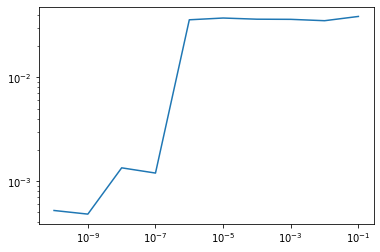

In [47]:
plt.plot(lr[1:],t)
plt.xscale('log')
plt.yscale('log')

## Scanning more lrs, in order to find the relation between lr and time for convergence

learning rate:  0.0001
Early stop at iteration:  2012
time:  0.16866469383239746
learning rate:  0.0001438449888287663
Early stop at iteration:  2245
time:  0.16928339004516602
learning rate:  0.00020691380811147902
Early stop at iteration:  2466
time:  0.17593979835510254
learning rate:  0.00029763514416313193
Early stop at iteration:  2631
time:  0.20833754539489746
learning rate:  0.00042813323987193956
Early stop at iteration:  2655
time:  0.1932048797607422
learning rate:  0.0006158482110660267
Early stop at iteration:  2568
time:  0.21102690696716309
learning rate:  0.0008858667904100823
Early stop at iteration:  2450
time:  0.17781496047973633
learning rate:  0.0012742749857031334
Early stop at iteration:  2320
time:  0.17957282066345215
learning rate:  0.0018329807108324356
Early stop at iteration:  2180
time:  0.1585526466369629
learning rate:  0.0026366508987303583
Early stop at iteration:  2041
time:  0.15771889686584473
learning rate:  0.00379269019073225
Early stop at iter

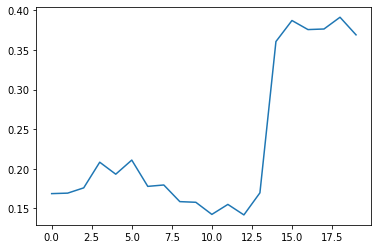

In [15]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels

lrs = np.logspace(-4, -1, 20) # different learning rates to try
times = []

for lr in lrs:
  model = Logistic_regression()
  print("learning rate: ", lr)
  t1 = time.time()
  w = model.fit(X, y, learning_rate=lr)
  t2 = time.time()
  print("time: ", t2-t1)
  times.append(t2-t1)

plt.plot(times)